In [1]:
#import all libs needed in the homework
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import math
from sympy import *

%matplotlib inline

### Problem 1

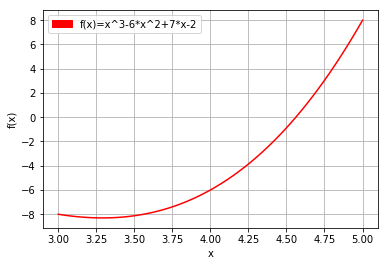

In [2]:
# Problem 1
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

#define f(x)
def f(x):
    y = x**3 - 6*(x**2) + 7*x -2
    return y
    
#define the samples in the interval (3, 5)
x = np.linspace(3, 5, 100)

#evaluate f(x) at x
y = f(x)

#illustrate the function f(x) in the interval (3, 5)
plt.plot(x, y, 'red', label='f(x)=x^3-6*x^2+7*x-2')

#Add Axes and a legend
red_patch = mpatches.Patch(color='red', label='f(x)=x^3-6*x^2+7*x-2')
plt.legend(handles=[red_patch])
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()
plt.show()

Root Estimate #1 : p(1) = 4.000000000e+00            actual error #1 : err(1) = 6.000000
Root Estimate #2 : p(2) = 4.500000000e+00            actual error #2 : err(2) = 0.875000
Root Estimate #3 : p(3) = 4.750000000e+00            actual error #3 : err(3) = 3.046875
Root Estimate #4 : p(4) = 4.625000000e+00            actual error #4 : err(4) = 0.962891
Root Estimate #5 : p(5) = 4.562500000e+00            actual error #5 : err(5) = 0.013916


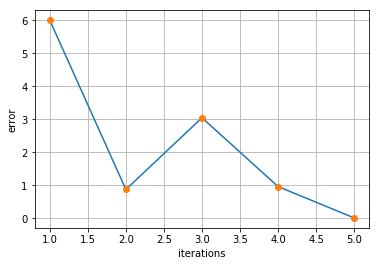

In [3]:
#bisection method
#define the first extremes a1 and b1 of the interval
a1 = 3
b1 = 5

#define iteration number 'N'
#define a matrix 'p' to store estimated root calulated in N iterations
#defint a matrix 'errors' to store the actual errors of each estimated root
N = 5
p = np.zeros(5)
errors = np.zeros(5)

#make N iterations
for i in range(0, N):
    p[i] = a1 + (b1 - a1) / 2
    errors[i] = abs(f(p[i]) - errors[i])
    print("Root Estimate #{0:d} : p({1:d}) = {2:10.9e} \
           actual error #{3:d} : err({4:d}) = {5:f}"
          .format(i+1, i+1, p[i], i+1, i+1, errors[i]))
    if f(p[i]) * f(a1) < 0:
        b1 = p[i]
    elif f(p[i]) * f(a1) > 0:
        a1 = p[i]
    else:
        print(p[i] + ' is the root of the equation in the interval(3, 5)')
        
plt.plot(np.linspace(1,5,5), errors)        
plt.plot(np.linspace(1,5,5), errors, 'o')
plt.xlabel('iterations')
plt.ylabel('error')
plt.grid()
plt.show()

#### A: It is evident that acutal errors do not steadily decrease.

###  
###  
###  
### Problem 2

In [4]:
#Problem 2
# Because the stem gives the interval (3, 4)
# in that interval, only sin(pi) = 0 and the function is monotonic

import math

#define f2(x) = sinx
def f2(x):
    var = math.sin(x) 
    return var

#define the interval (3, 4)
a2 = 3
b2 = 4

#define the allowable error range(5 decimal)
eps = 0.000001

#define a list to store estimated root and initial the list
p2 = []
p2_first = a2 + (b2-a2)/2
p2.append(p2_first)

#iteration
while abs(f2(p2[-1])) > eps:
    if f2(p2[-1]) * f2(a2) > 0:
        a2 = p2[-1]
    elif f2(p2[-1]) * f2(a2) < 0:
        b2 = p2[-1]
    else:
        break
    p2_next = a2 + (b2-a2)/2 
    p2.append(p2_next)

#print out final answer
print("{0:f} is the value found by bisection of pi".format(p2[-1]))

3.141592 is the value found by bisection of pi


#### A: 3.141592 is the value found by bisection of pi









###  
###  
###  
###  
###  
###  
### Problem 3

#### Limitation 1: It can only find one root in a given interval.
##### For example, define the function g(x) = x(x-1)(x-2). Find the roots that lie in the interval (-1, 2.5)

In [5]:
#Example 1
def g(x):
    var = x*(x-1)*(x-2)
    return var

a3 = -1
b3 = 2.5

eps = 0.00001
p3 = []
p3_first = a3 + (b3-a3)/2
p3.append(round(p3_first, 3))

#iteration
while abs(g(p3[-1])) > eps:
    if g(p3[-1]) * g(a3) > 0:
        a3 = p3[-1]
    elif g(p3[-1]) * g(a3) < 0:
        b3 = p3[-1]
    else:
        break
    p3_next = a3 + (b3-a3)/2 
    p3.append(round(p3_next, 3))
print('Find the root x = {0:f}'.format(p3[-1]))

Find the root x = 0.000000


##### In this case, the bisection method only found x = 0. But x=1 and x=2 lie in the interval too.

#### Limitation 2: It converges linearly, so it may waste much time.
##### For example, define the function g(x) = x(x-1)(x-2). Find the convergence order of bisection method.

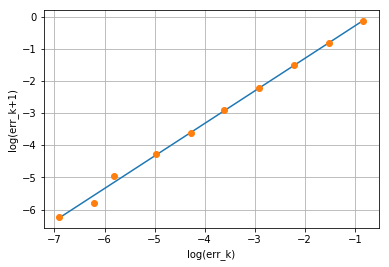

Convergence order is 1.010335, aprroximately equal to 1


In [6]:
#Example 2
err3 = []
logerr3_k = []
logerr3_k1 = []
for i in range(len(p3)-1):
    err3.append(abs(p3[i+1] - p3[i]))
    logerr3_k.append(math.log(err3[-1]))  #log(err_k)
logerr3_k1 = logerr3_k[1:]                #log(err_k+1)

x3 = logerr3_k1
y3 = logerr3_k[0:len(x3)]
coefs3 = np.polyfit(x3, y3, 1)
z3 = coefs3[[0]] * x3 + coefs3[[1]]
r3 = float(coefs3[[0]])

plt.plot(x3, z3)
plt.plot(x3, y3, 'o')
plt.xlabel('log(err_k)')
plt.ylabel('log(err_k+1)')
plt.grid()
plt.show()

print('Convergence order is {0:f}, aprroximately equal to 1'.format(abs(r3)))

##### In this case, convergence order is approximately equal to 1, which means the convergency is linear and slow.
###  
###  
###  
###  

###  
###  
###  
###  
### Problem 4

In [7]:
#Problem 4
# (a)
#define the function
def f4(x):
    var4 = x**5 - 5
    return var4

#define the deivative function
def df4(x):
    dvar4 = 5 * (x**4)
    return dvar4

#define the interval (1, 2)
a4 = 1
b4 = 2

#let the iteration start at x = 1.9
#set the times of iteration as N
start = 1.9
N = 6
p4 = []
p4.append(start)
#iteration
for i in range(N):
    assert df4(p4[i]) != 0, "DENOMINATOR CANNOT BE 0!"
    p4_tmp = p4[i] - f4(p4[i]) / df4(p4[i])
    p4.append(p4_tmp)
print("After 5 iterations, the estimated root is {0:f}".format(p4[5]))

After 5 iterations, the estimated root is 1.379730


In [8]:
#(b)
#set |pn - pn-1| = delta_p4_1; |pn-1 - p| = delta_p4_2; |pn - p| = delta_p4_3
delta_p4_1 = []
delta_p4_2 = []
delta_p4_3 = []
for ii in range(N-1):
    delta_p4_1.append(abs(p4[ii+1] - p4[ii]))
    delta_p4_2.append(abs(p4[ii] - p4[N]))
    delta_p4_3.append(abs(p4[ii+1] - p4[N]))
    
arr1 = np.array(delta_p4_1)
arr2 = np.array(delta_p4_2)
arr3 = np.array(delta_p4_3)
#|pn - pn-1| = |pn-1 - p| - |pn - p| i.e. delta_p4_1 = delta_p4_2 - delta_p4_3
print("|pn - pn-1| - |pn-1 - p| + |pn - p| =")
print(arr1 + arr3 - arr2)

|pn - pn-1| - |pn-1 - p| + |pn - p| =
[0. 0. 0. 0. 0.]


##### $\therefore |p_{n} - p_{n-1}| = |p_{n-1} - p| - |p_{n} - p|$

[6.47863745e-01 3.55977857e-01 1.01539533e-01 7.47782846e-03
 3.89015825e-05]


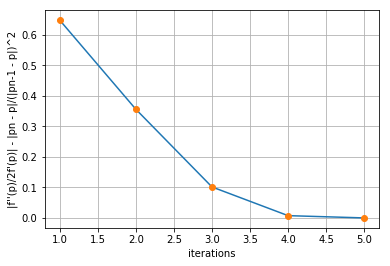

In [9]:
#(c)
ratio_4 = arr3 / arr2 / arr2

def ddf4(x):
    ddvar = 5 * 4 * (x**3)
    return ddvar

ratio_final = abs(ddf4(p4[-1])/ (2 * df4(p4[-1])))

x4 = np.array(range(1, 6))
print(abs(ratio_4 - ratio_final))
plt.plot(x4, abs(ratio_4 - ratio_final))
plt.plot(x4, abs(ratio_4 - ratio_final), 'o')
plt.xlabel('iterations')
plt.ylabel("|f''(p)/2f'(p)| - |pn - p|/(|pn-1 - p|)^2")
plt.grid()
plt.show()

##### It is evident from the figure that ratio  $|p_n - p| / |p_n - p|^2$  approaches to $|f''(p)/2f'(p)|$ 
###  
###  
###  
###  
###  

###  
###   
###  
### Problem 5

In [10]:
#Problem 5
#define the function of Newton_method
def Newton_method(start_point, f, df, epoch = 0, eps = -1):
    p = []
    p.append(start_point)
    if epoch != 0:
        for i in range(epoch):
            assert df(p[i]) != 0, "DENOMINATOR CANNOT BE 0!"
            p_tmp = p[i] - f(p[i]) / df(p[i])
            p.append(p_tmp)
    if eps != -1:
        assert df(p[-1]) != 0, "DENOMINATOR CANNOT BE 0!"
        p.append(p[-1] - f(p[-1]) / df(p[-1]))
        while(abs(p[-1] - p[-2]) > eps):
            assert df(p[-1]) != 0, "DENOMINATOR CANNOT BE 0!"
            p_tmp = p[-1] - f(p[-1]) / df(p[-1])
            p.append(p_tmp)
    return p

#define the function to calculate log(en)
def getError(rootlist, form, real_root = -999):
    err = []
    if form == 'log':
        for i in range(len(rootlist)-1):
#             print(i)
            err.append(math.log(abs(rootlist[i+1]-rootlist[i])))
    if form == 'ordinary' :
        for i in range(len(rootlist)-1):
            err.append(abs(rootlist[i+1]-rootlist[i]))
    if form == 'absolute':
        for i in range(len(rootlist)):
            err.append(abs(rootlist[i] - real_root))
    return err

#define the function to plot log(en) against log(en-1)
def plotLogErrorFigure(rootlist):
    logen = getError(rootlist, "log")
    logen1 = logen[:-1]
    x = logen1
    y = logen[1:]
    coefs = np.polyfit(x, y, 1)
    z = coefs[[0]] * x + coefs[[1]]
    plt.plot(x, z)
    plt.plot(x, y, 'o')
    plt.xlabel('log(en-1)')
    plt.ylabel('log(en)')
    plt.grid()

def calCoefficient(rootlist):
    list_tmp = getError(rootlist, 'log')
    x = list_tmp[:-1]
    y = list_tmp[1:]
    coefs = np.polyfit(x, y, 1)
    return coefs

##### (a) $\because f'(x) = - e^x + 1$     $\therefore f'(0) = 0$
#####  $\therefore f(x)$ monotonically increase in $(-\infty, 0)$,  monotonically decrease in $(0, \infty)$
#####  $\because f(0) = 1 > 0 $ $\therefore f(x)$ has at most 2 roots

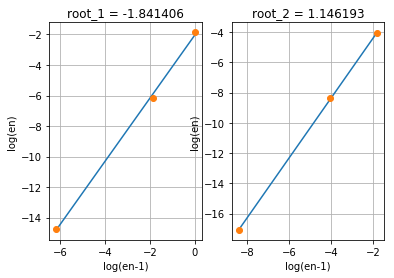

The order calculated of root_1 is 2.063485, which is approximate equal to 2.
The order calculated of root_2 is 1.985015, which is approximate equal to 2.


In [11]:
# (a)
def f5_a(x):
    var5a = - math.e**x + x + 2
    return var5a

def df5_a(x):
    dvar5a = - math.e**x + 1
    return dvar5a

#set parameters
start_point_1 = -1
start_point_2 = 1
epsilon = 1e-6

#iterations, get rootlist
p5_a_1 = Newton_method(start_point_1, f5_a, df5_a, eps = epsilon)
p5_a_2 = Newton_method(start_point_2, f5_a, df5_a, eps = epsilon)

#root estimated
root_a_1 = p5_a_1[-1]
root_a_2 = p5_a_2[-1]    

#plot
plt.subplot(121)
plotLogErrorFigure(p5_a_1)
plt.title('root_1 = {0:f}'.format(root_a_1))
plt.subplot(122)
plotLogErrorFigure(p5_a_2)
plt.title('root_2 = {0:f}'.format(root_a_2))
plt.show()

#output
coefs5_a_1 = calCoefficient(p5_a_1)
coefs5_a_2 = calCoefficient(p5_a_2)
print("The order calculated of root_1 is {0:f}, which is approximate equal to 2."
      .format(float(coefs5_a_1[[0]])))
print("The order calculated of root_2 is {0:f}, which is approximate equal to 2."
      .format(float(coefs5_a_2[[0]])))

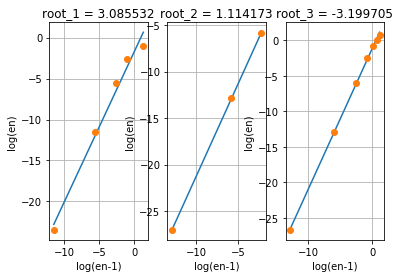

The order calculated of root_1 is 1.822496, which is approximate equal to 2.
The order calculated of root_2 is 1.991429, which is approximate equal to 2.
The order calculated of root_3 is 1.972865, which is approximate equal to 2.


In [12]:
#(b)
def f5_b(x):
    var = x**3 - x**2 - 10*x +11
    return var

def df5_b(x):
    dvar = 3*x**2 -2*x -10
    return dvar

#set parameters
start_point_1 = -1
start_point_2 = 1
start_point_3 = -10
epsilon = 1e-6

#iterations, get rootlist
p5_b_1 = Newton_method(start_point_1, f5_b, df5_b, eps = epsilon)
p5_b_2 = Newton_method(start_point_2, f5_b, df5_b, eps = epsilon)
p5_b_3 = Newton_method(start_point_3, f5_b, df5_b, eps = epsilon)

#root estimated
root_b_1 = p5_b_1[-1]
root_b_2 = p5_b_2[-1]
root_b_3 = p5_b_3[-1]

#plot
plt.subplot(131)
plotLogErrorFigure(p5_b_1)
plt.title('root_1 = {0:f}'.format(root_b_1))
plt.subplot(132)
plotLogErrorFigure(p5_b_2)
plt.title('root_2 = {0:f}'.format(root_b_2))
plt.subplot(133)
plotLogErrorFigure(p5_b_3)
plt.title('root_3 = {0:f}'.format(root_b_3))
plt.show()

#output
coefs5_b_1 = calCoefficient(p5_b_1)
coefs5_b_2 = calCoefficient(p5_b_2)
coefs5_b_3 = calCoefficient(p5_b_3)
print("The order calculated of root_1 is {0:f}, which is approximate equal to 2."
      .format(float(coefs5_b_1[[0]])))
print("The order calculated of root_2 is {0:f}, which is approximate equal to 2."
      .format(float(coefs5_b_2[[0]])))
print("The order calculated of root_3 is {0:f}, which is approximate equal to 2."
      .format(float(coefs5_b_3[[0]])))

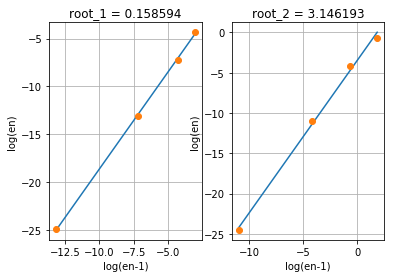

The order calculated of root_1 is 2.041171, which is approximate equal to 2.
The order calculated of root_2 is 1.891812, which is approximate equal to 2.


In [13]:
#(c)
def f5_c(x):
    var = 2 - x + math.log(x)
    return var

def df5_c(x):
    var = -1 + 1/x
    return var

#set parameters
start_point_1 = 0.1
start_point_2 = 10
epsilon = 1e-6

#iterations, get rootlist
p5_c_1 = Newton_method(start_point_1, f5_c, df5_c, eps = epsilon)
p5_c_2 = Newton_method(start_point_2, f5_c, df5_c, eps = epsilon)

#root estimated
root_c_1 = p5_c_1[-1]
root_c_2 = p5_c_2[-1]

#plot
plt.subplot(121)
plotLogErrorFigure(p5_c_1)
plt.title('root_1 = {0:f}'.format(root_c_1))
plt.subplot(122)
plotLogErrorFigure(p5_c_2)
plt.title('root_2 = {0:f}'.format(root_c_2))
plt.show()

#output
coefs5_c_1 = calCoefficient(p5_c_1)
coefs5_c_2 = calCoefficient(p5_c_2)
print("The order calculated of root_1 is {0:f}, which is approximate equal to 2."
      .format(float(coefs5_c_1[[0]])))
print("The order calculated of root_2 is {0:f}, which is approximate equal to 2."
      .format(float(coefs5_c_2[[0]])))

##### In summary 
##### a)  has 2 roots:  $r_1 = -1.841406, r_2 = 1.146193$ ; and $order_{1,2} = 2$
##### b) has 3 roots: $r_1 = 3.085532, r_2 = 1.114173, r_3=-3.199705 $ ; and $order_{1,2,3} = 2$
##### b) has 2 roots: $r_1 = 0.158594, r_2 = 3.146193$  ; and $order_{1,2} = 2$

###  
###  
###  

###  
###  
###  
###  
###  
###  
###  
###  
###  
###  
###  
###  
###  
###  
###  
###  
###  
###  
###  
### Problem 6

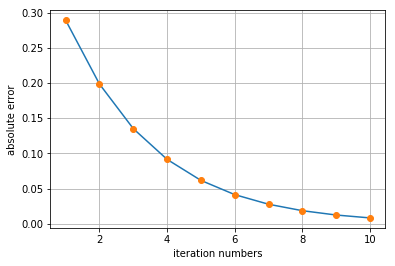

The estimated root is 0.983456
The order calculated of the root is 1.008207, which is approximate equal to 1.


In [14]:
#Problem 6
#use some functions defined in Problem 5
def f6(x):
    var = x**4 -11*x**3 + 27*x**2 - 25*x + 8
    return var
def df6(x):
    var = 4*x**3 - 33*x**2 + 54*x -25
    return var

#set parameters
start_point = 0.5
N = 10

#iterations, get rootlist
p6 = Newton_method(start_point_1, f6, df6, epoch = N)

#root estimated
root_6 = p6[-1]
#calculate the absolute error
err_6 = getError(p6, "ordinary")

#plot the errors against iteration number
iters = range(1, N+1)
plt.plot(iters, err_6)
plt.plot(iters, err_6, 'o')
plt.xlabel('iteration numbers')
plt.ylabel('absolute error')
plt.grid()
plt.show()

#calculate the order
coefs6 = calCoefficient(p6)
print("The estimated root is {0:f}".format(p6[-1]))
print("The order calculated of the root is {0:f}, which is approximate equal to 1."
      .format(float(coefs6[[0]])))

###  
###  
### Problem 7

In [15]:
#Problem 7
#(a)
def f7(x):
    var = x**4 - 18*(x**2) + 45
    return var

def df7(x):
    var = 4*(x**3) -36*x
    return var

a7=1
b7=2
fa7 = f7(a7)
fb7 = f7(b7)
print("f(1) = {0:d}, f(2) = {1:d}".format(fa7, fb7))

f(1) = 28, f(2) = -11


##### $\because f(1) = 28 > 0, f(2) = -11 < 0$
##### $\therefore $ The equation has a root on the interval (1, 2).

In [16]:
#set parameters
start_point = 1
N = 4

#iterations, get rootlist
p7_a = Newton_method(start_point, f7, df7, epoch = N)

#root estimated
root_7_a = p7_a[-1]
#calculate the absolute error
err_a = getError(p7_a, "absolute", 3**0.5)

#calculate the order
logerr_a = []
for i in range(len(err_a[:-1])):
    logerr_a.append(math.log(err_a[i]))
x7_tmp = logerr_a[:-1]
y7_tmp = logerr_a[1:]
coefs7_a = np.polyfit(x7_tmp, y7_tmp, 1)
print("The estimated root is {0:f}".format(root_7_a))
print("The order calculated of the root is {0:f}, which is approximate equal to 3."
      .format(float(coefs7_a[[0]])))

The estimated root is 1.732051
The order calculated of the root is 3.012349, which is approximate equal to 3.


In [17]:
#(b)
#set parameters
start_point_1 = 3
start_point_2 = 4
N = 4

#iterations, get rootlist
p7_b = Newton_method(start_point_2, f7, df7, epoch = N)

#root estimated
root_7_b = p7_b[-1]
#calculate the absolute error
err_b = getError(p7_b, "absolute", 15**0.5)

#calculate the order
logerr_b = []
for i in range(len(err_b[:-1])):
    logerr_b.append(math.log(err_b[i]))
x7_tmp = logerr_b[:-1]
y7_tmp = logerr_b[1:]
coefs7_b = np.polyfit(x7_tmp, y7_tmp, 1)
print("The estimated root is {0:f}, starting at x = 4".format(root_7_b))
print("The order calculated of the root is {0:f}, which is approximate equal to 2."
      .format(float(coefs7_b[[0]])))
print("If the iteration starts at x = 3, then f'(x) = 0 and Newtom Method does not work.")

The estimated root is 3.872983, starting at x = 4
The order calculated of the root is 1.983856, which is approximate equal to 2.
If the iteration starts at x = 3, then f'(x) = 0 and Newtom Method does not work.


In [18]:
#(c)
def NF(x, f, df, n):
    t = symbols('x')
    var = t - f(t)/df(t)
    dvar = round(diff(var, t, n).subs(t, x), 3)
    return dvar

root_1 = 3**0.5
root_2 = 15**0.5
t = symbols('x')

Fx_1 = []
Fx_2 = []
for i in range(5):
    Fx_1.append(NF(root_1, f7, df7, i))
    Fx_2.append(NF(root_2, f7, df7, i))
print("Derivative functions set evaluated at root = 3**0.5:")
print(Fx_1)
print("Derivative functions set evaluated at root = 15**0.5:")
print(Fx_2)

Derivative functions set evaluated at root = 3**0.5:
[1.732, -0.0, 0.0, -2.0, -1.732]
Derivative functions set evaluated at root = 15**0.5:
[3.873, -0.0, 1.549, -5.2, 23.703]


##### The function of Newton's method is $\varphi(x)=x-\frac{f(x)}{f'(x)} $.  From the output, it shows that 
##### $\varphi'(\sqrt3)=\varphi^{(2)}(\sqrt3) = 0, but\space \varphi^{(3)}(\sqrt{3})\neq 0$
##### $\varphi'(\sqrt{15}) = 0 ,but\space \varphi^{(2)}(\sqrt{15})\neq 0$
##### So the order of convergence of root $\sqrt3$ is 3,
##### The order of convergence of root $\sqrt{15}$ is 2.

###  
###  
###  

###  
###  
###  

###  
###  
###  
###  
###  
###  
###  
###  
###  
###  
###  
###  
###  
###  
###  
###  
### Problem 8

In [19]:
#Problem 8
#define the secant method
def secant_method(f, start_point1, start_point2, epoch = 0, eps = -1):
    x = []
    x.append(start_point1)
    x.append(start_point2)
    if epoch != 0:
        for i in range(epoch):
            x_tmp = x[-1] - f(x[-1])*(x[-1]-x[-2])/(f(x[-1])-f(x[-2]))
            x.append(x_tmp)
    if eps != -1:
        while(abs(x[-1]-x[-2]) > eps):
            x_tmp = x[-1] - f(x[-1])*(x[-1]-x[-2])/(f(x[-1])-f(x[-2]))
            x.append(x_tmp)
    return x

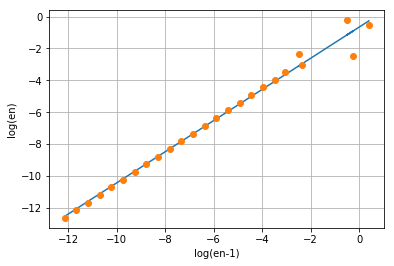

The order calculated of the root is 1.003039.


In [20]:
#(a)
def f8_a(x):
    var = x * math.sin(x)
    return var

#set parameters
start_point_1 = -1
start_point_2 = 0.5
Nmax = 25

#iterations, get the rootlist
p8_a = secant_method(f8_a, start_point_1, start_point_2, Nmax)
root_8_a = p8_a[-1]

err_8_a = getError(p8_a, "absolute", 0)

#calculate the order
logerr_8_a = []
for i in range(len(err_8_a[:-1])):
    logerr_8_a.append(math.log(err_8_a[i]))

x8a_tmp = logerr_8_a[:-1]
y8a_tmp = logerr_8_a[1:]
coefs8_a = np.polyfit(x8a_tmp, y8a_tmp, 1)
plotLogErrorFigure(p8_a)
plt.show()

print("The order calculated of the root is {0:f}."
      .format(float(coefs8_a[[0]])))

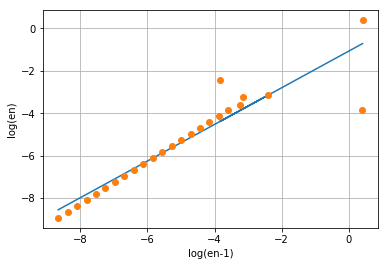

The order calculated of the root is 1.003073.


In [21]:
#(b)
def f8_b(x):
    var = 27*x**4 + 162*x**3 - 180*x**2 + 62*x -7 
    return var

#set parameters
start_point_1 = 0
start_point_2 = 1.5
Nmax = 25

#iterations, get the rootlist
p8_b = secant_method(f8_b, start_point_1, start_point_2, Nmax)
root_8_b = p8_b[-1]
err_8_b = getError(p8_b, "absolute", 1/3)

#calculate the order
logerr_8_b = []
for i in range(len(err_8_b[:-1])):
    logerr_8_b.append(math.log(err_8_b[i]))

x8b_tmp = logerr_8_b[:-1]
y8b_tmp = logerr_8_b[1:]
coefs8_b = np.polyfit(x8b_tmp, y8b_tmp, 1)
plotLogErrorFigure(p8_b)

plt.show()

print("The order calculated of the root is {0:f}."
      .format(float(coefs8_b[[0]])))

##### From the analysis above, we can find the order of the secant method dropped to 1 when the roots are of multiplicity.